In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
%matplotlib inline

In [64]:
df = pd.read_csv('health_ins.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
df[:,1]

TypeError: unhashable type: 'slice'

In [ ]:
le = preprocessing.LabelEncoder()
for i in range(*NUMBER OF FEATURES*):
    df[:,i] = le.fit_transform(df[:,i])

In [54]:
df['region_cat']=df['region'].astype('category')
df['sex_cat']=df['sex'].astype('category')
df['smoker_cat']=df['smoker'].astype('category')

In [59]:
X, y = df.loc[:,['age','sex_cat','bmi','children','region_cat','sex_cat','smoker_cat']], df.charges

In [62]:
X.dtypes

age              int64
sex_cat       category
bmi            float64
children         int64
region_cat    category
sex_cat       category
smoker_cat    category
dtype: object

In [61]:
regression_tree = tree.DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10,random_state=0)
regression_tree.fit(X,y)

ValueError: could not convert string to float: 'yes'

In [47]:
pythscore = np.mean(cross_val_score(regression_tree, X, y, scoring='mean_squared_error', cv=crossvalidation,n_jobs=1))
#print 'Mean squared error: %.3f' % abs(score)

ValueError: could not convert string to float: 'northwest'

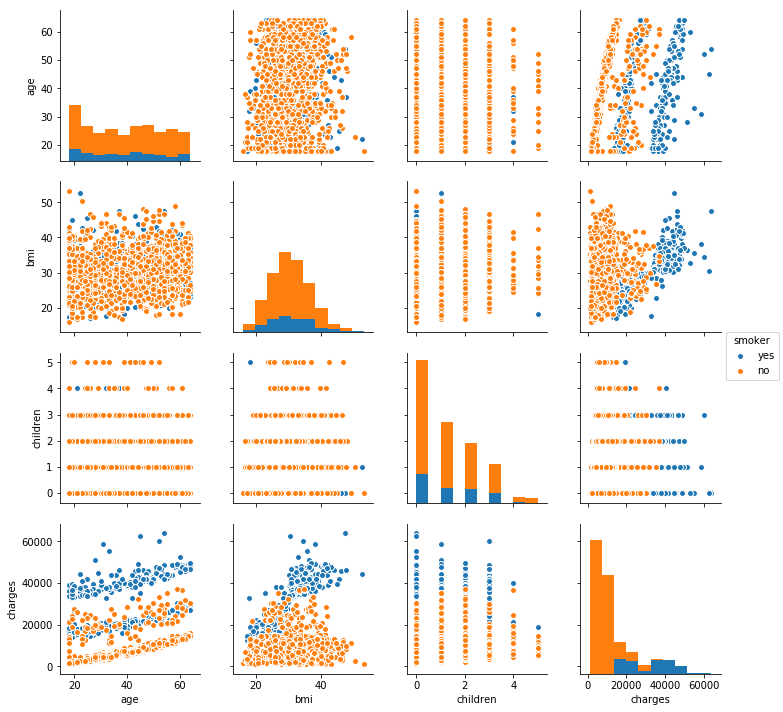

In [7]:
sns.pairplot(df, hue='smoker')

C:\Users\user\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


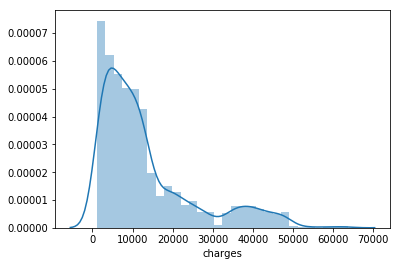

In [8]:
sns.distplot(df.charges)

In [14]:
df.groupby('smoker').describe().transpose()

smoker                    no           yes
age      count   1064.000000    274.000000
         mean      39.385338     38.514599
         std       14.083410     13.923186
         min       18.000000     18.000000
         25%       26.750000     27.000000
         50%       40.000000     38.000000
         75%       52.000000     49.000000
         max       64.000000     64.000000
bmi      count   1064.000000    274.000000
         mean      30.651795     30.708449
         std        6.043111      6.318644
         min       15.960000     17.195000
         25%       26.315000     26.083750
         50%       30.352500     30.447500
         75%       34.430000     35.200000
         max       53.130000     52.580000
charges  count   1064.000000    274.000000
         mean    8434.268298  32050.231832
         std     5993.781819  11541.547176
         min     1121.873900  12829.455100
         25%     3986.438700  20826.244213
         50%     7345.405300  34456.348450
         75%    11362.887050  41019.207275
         max    36910.608030  63770.428010
children count   1064.000000    274.000000
         mean       1.090226      1.113139
         std        1.218136      1.157066
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        1.000000      1.000000
         75%        2.000000      2.000000
         max        5.000000      5.000000

In [22]:
df[['age','bmi','charges']]

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
5,31,25.740,3756.62160
6,46,33.440,8240.58960
7,37,27.740,7281.50560
8,37,29.830,6406.41070
9,60,25.840,28923.13692


In [32]:
df['bmi_int']=df['bmi'].round()

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_int
0,19,female,27.900,0,yes,southwest,16884.92400,28.0
1,18,male,33.770,1,no,southeast,1725.55230,34.0
2,28,male,33.000,3,no,southeast,4449.46200,33.0
3,33,male,22.705,0,no,northwest,21984.47061,23.0
4,32,male,28.880,0,no,northwest,3866.85520,29.0


In [36]:
hm = df.pivot_table(index='age', columns='smoker', values='charges')
hm

smoker,no,yes
age,,
18,3215.162259,25473.730221
19,3536.712898,27001.232768
20,3673.112925,24574.330650
21,3813.530413,16650.605250
22,2551.017880,37373.287517
23,5980.978162,31736.345671
24,5587.430232,29203.496972
25,5547.187943,29577.781200
26,4166.516168,22528.068150


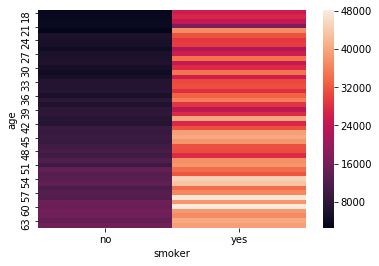

In [35]:
sns.heatmap(df.pivot_table(index='age', columns='smoker', values='charges'))

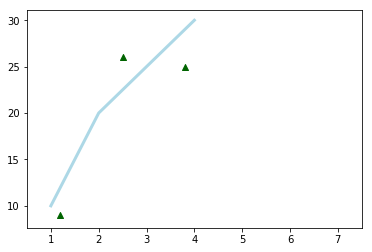

In [3]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 7.5)
plt.show()